# THE WORLD'S MOST POWERFUL WOMEN 2021

https://www.forbes.com/power-women/#27ceafd85e25

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

import requests

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# year data to fetch
year = 2021

url = 'http://www.forbes.com/ajax/list/data'

parameter =  {'type': 'person', 'year': year, 'uri': 'power-women'}

r = requests.get(url=url, params=parameter)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=UTF-8 -- Encoding: UTF-8


# Append Data

In [4]:
rank = []
name = []


for i in range(100):
  rank.append(r.json()[i]['rank'])
  name.append(r.json()[i]['name'])

# Create Dataframe 

In [5]:
data = {
  'Rank': rank,
  'Name': name
}

df = pd.DataFrame(data=data)

# Head and Tail

In [6]:
df

,Rank,Name
0,1,MacKenzie Scott
1,2,Kamala Harris
2,3,Christine Lagarde
3,4,Mary Barra
4,5,Melinda French Gates
...,...,...
95,96,Renuka Jagtiani
96,97,Chrystia Freeland
97,98,Mo Abudu
98,99,Christiana Figueres


In [7]:
df.shape

(100, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    100 non-null    int64 
 1   Name    100 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [9]:
df['Rank'] = df['Rank'].astype('category')                      # change Rank data type to categorical                
df['Rank'].dtypes

CategoricalDtype(categories=[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
                   13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
                   25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
                   37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
                   49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
                   61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
                   73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
                   85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
                   97,  98,  99, 100],
, ordered=False)

In [10]:
df.describe(include='object')

,Name
count,100
unique,100
top,MacKenzie Scott
freq,1


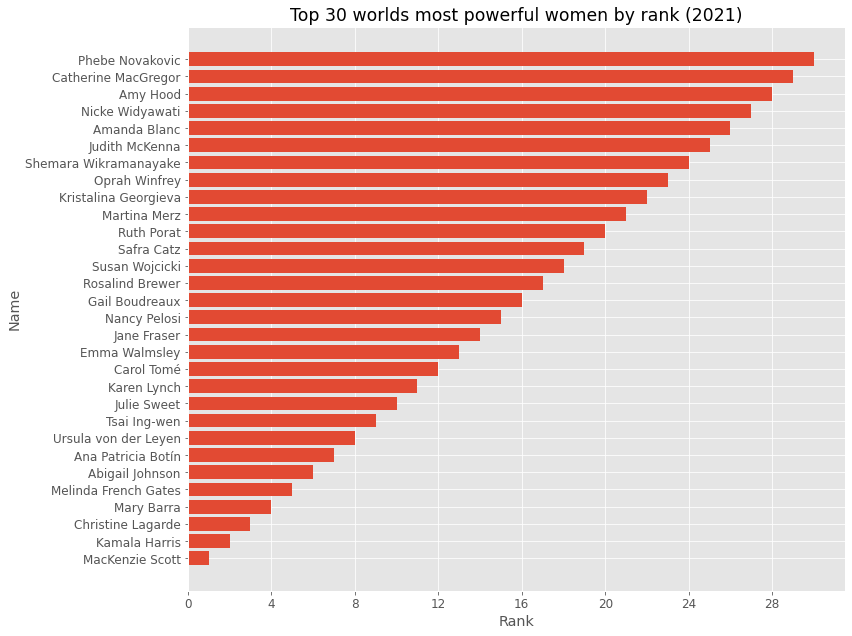

In [11]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
ax.barh(y=df['Name'][:30], width=df['Rank'][:30])
ax.set(title='Top 30 worlds most powerful women by rank (2021)', xlabel='Rank', ylabel='Name')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))